In [90]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Classification

Machine learning gives computers the ability to learn from data without being explicitly programmed to do so.
- Supervised Learning: Labels are present. Features are used to predict a target variable.
- Classification is for a non-continuous, categorical target. 
    - Yes/No. 
    - 1/2/3. 
    - Small/Medium/Large.

## Expoloratory Data Analysis:

In [91]:
iris = datasets.load_iris()

In [92]:
iris.keys() # data: values, target: target values.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [93]:
iris['data'].shape # 150 samples, four features

(150, 4)

In [94]:
iris['feature_names'] # Four features.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [95]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [96]:
X = iris['data']
y = iris['target']

df = pd.DataFrame(X, columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


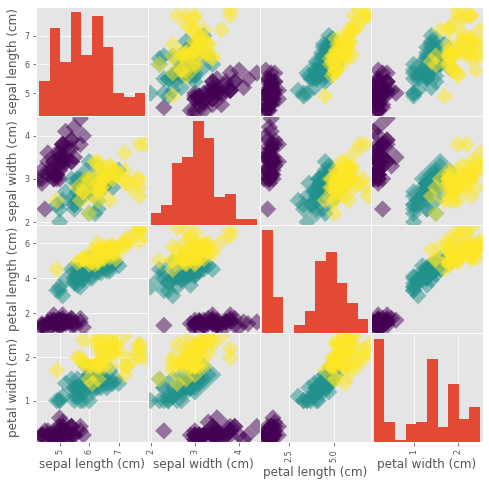

In [97]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8,8], s = 150, marker = 'D')
plt.show()

In [98]:
full_data = np.concatenate((iris['data'], iris['target'].reshape(150,1)), axis = 1)
plot_data = pd.DataFrame(full_data, 
                         columns = ['sepal length (cm)',
                                    'sepal width (cm)',
                                    'petal length (cm)',
                                    'petal width (cm)',
                                    'Species'])

In [99]:
species_map = {
    0: 'setosa', 
    1: 'versicolor',
    2: 'virginica'
}

In [100]:
plot_data['Species'] = plot_data['Species'].map(species_map)

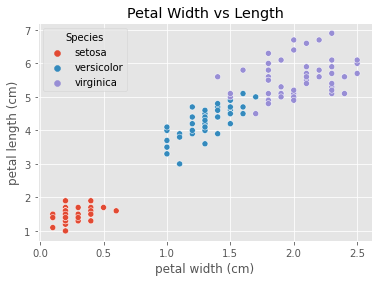

In [101]:
sns.scatterplot(x = 'petal width (cm)', y = 'petal length (cm)', hue = 'Species', data = plot_data)
plt.title('Petal Width vs Length')
plt.show()

## The Classifier - KMeans

KMeans will create a series of bounding boxes/grids/circles etc. that will define the species type that lies within each bounded region.

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [103]:
# Step 1: Instantiate the model
model = KNeighborsClassifier(n_neighbors = 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

# Step 2: Fit the data to the model (X, y)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [104]:
# Step 3: Predict on entirely new data
X_new = np.array([[5.6, 2.8, 3.9, 1.1], [5.7, 2.6, 3.8, 1.3], [4.7, 3.2, 1.3, 0.2]])
prediction = model.predict(X_new)

print(X_new.shape) # Three samples, with the four usual features
print(f'Predictions: {prediction}')

(3, 4)
Predictions: [1 1 0]


In [105]:
# Step 4: Measure model performance
y_preds = model.predict(X_test)
model.score(X_test, y_test) # Accuracy %

0.9333333333333333

### MNIST

In [106]:
digits = datasets.load_digits()

In [107]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

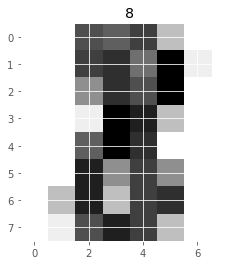

In [108]:
plt.imshow(digits['images'][40], cmap = plt.cm.gray_r)
plt.title(digits['target'][40])
plt.show()

In [109]:
X = digits['data']
y = digits['target']

X.shape, y.shape

((1797, 64), (1797,))

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [111]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [112]:
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
model.score(X_test, y_test)

0.9694444444444444

## Underfitting and Overfitting

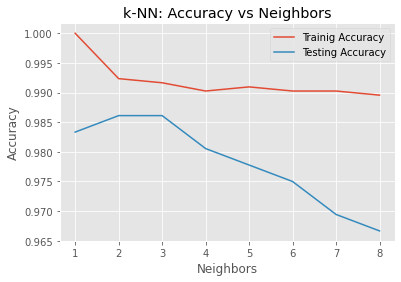

In [113]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    
    train_accuracy[i] = model.score(X_train, y_train)
    test_accuracy[i] = model.score(X_test, y_test)
    
plt.plot(neighbors, train_accuracy, label = 'Trainig Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.title('k-NN: Accuracy vs Neighbors')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy rapidly declines after three neighbors in the test set. 

# Regression

Regression problems involve continuous variables. 
- House prices
- Country's GDP

Regression differs from classificaiton in that we're almost looking for a line of best fit. 

In [114]:
from sklearn.metrics import mean_squared_error

In [115]:
boston = datasets.load_boston()

In [116]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [117]:
boston_data = np.concatenate((boston['data'], boston['target'].reshape(506,1)), axis = 1)
data = pd.DataFrame(boston_data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'TARGET'])

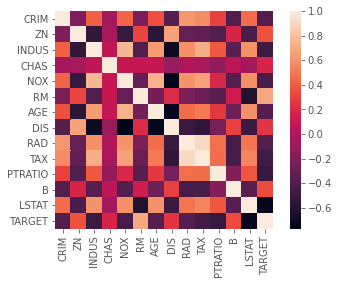

In [118]:
sns.heatmap(data.corr(), square = True)
plt.show()

### Regression using one feature

In [119]:
# Evaluating a single feature
X = data.loc[:,'RM']
y = data.loc[:,'TARGET']

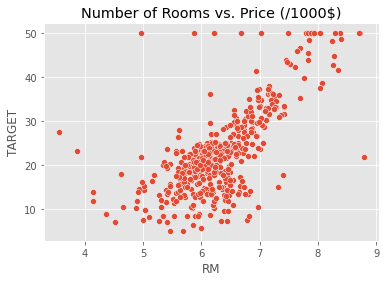

In [120]:
sns.scatterplot(x = X, y = y)
plt.title('Number of Rooms vs. Price (/1000$)')
plt.show()

In [121]:
# sklearn does not like (100,) arrays. Must be (100, 1)
X = X.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

In [122]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1) # Make a range of min to max values to predict over.

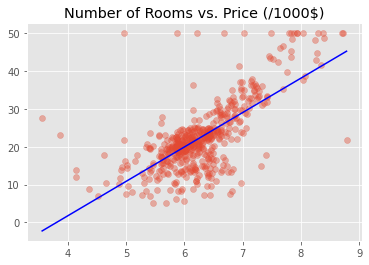

In [123]:
plt.scatter(X, y, alpha = 0.4)
plt.plot(prediction_space, model.predict(prediction_space), color = 'blue')
plt.title('Number of Rooms vs. Price (/1000$)')
plt.show()

### Regression using all features

In [124]:
y = data['TARGET']
X = data.drop('TARGET', axis = 1)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [126]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = model.score(X_test, y_test) ## R^2
mse = mean_squared_error(y_pred, y_test) ## Mean Squared Error

print('R^2 Score: ', r2)
print('Mean Squared Error:', mse)
print('Root MSE:', np.sqrt(mse))

R^2 Score:  0.6733825506400171
Mean Squared Error: 27.195965766883408
Root MSE: 5.214975145375423


## Cross Validation

One issue with train_test_split is that if the data is ordered then the split might split on the ordered data. Cross Validation changes the splits per fold. This will return scores for each fold. 
- More folds = more computation

In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
model = LinearRegression()
cv = cross_val_score(model, X, y, cv = 5)
cv # Scores are given back as R^2
np.mean(cv)

0.353275924395883

## Regularised Regression

The more features the easier it is to predict. Overfitting. It's import to regularise. Can be achieved by minising large coefficients. 
- Ridge Regression (L2): Penalised for large +,- coefficients. Requires an alpha parameter and normalize. 
- Lasso Regression (L1): Penalised for large aboslute value coefficients. Requires an alpha paramter and normalize.<b> Lasso will pick important features.<b> 

In [129]:
from sklearn.linear_model import Ridge, Lasso

### Ridge (L2)

In [130]:
model = Ridge(alpha = 0.1, normalize = True)
cv = cross_val_score(model, X, y, cv = 5)
np.mean(cv)

0.45392324833865744

In [131]:
model = Ridge(alpha = 0.1, normalize = True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.6550662530677254

### Lasso (L1)

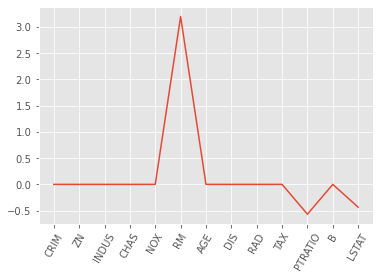

In [132]:
# Normalized

model = Lasso(alpha = 0.1, normalize = True)
model_coeff = model.fit(X_train, y_train).coef_

names = data.drop('TARGET', axis = 1).columns

_ = plt.plot(range(len(names)), model_coeff)
_ = plt.xticks(range(len(names)), names, rotation = 60)
plt.show()

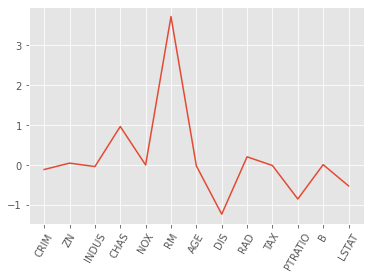

In [133]:
# Not Normalised

model = Lasso(alpha = 0.1)
model_coeff = model.fit(X_train, y_train).coef_

names = data.drop('TARGET', axis = 1).columns

_ = plt.plot(range(len(names)), model_coeff)
_ = plt.xticks(range(len(names)), names, rotation = 60)
plt.show()

# Alternative Metrics

Accuracy is not always the best metric. Say 99% of emails are real. A model that classifies all emails as real will have an accuarcy of 99%. Never predicts spam. No good. This is known as class imbalance. Need other metrics to evaluate the model. 

Confusion Matrix:

                        Preicted No        Predicted Yes
        Actual No           TP                  FN
        
        Actual Yes          FP                  TN  



Accuracy = (TP + TN)/(TP + FN + FP + TN)

Precision = TP/(TP + FP) -- Correctly labeled emails

Recall = TP/(TP + FN) -- Sensitivity

F1 Score = (Precision*Recall)/(Precision + Recall)

In [134]:
from sklearn.metrics import classification_report, confusion_matrix

In [135]:
# Iris
X = iris['data'][:99]
y = iris['target'][:99]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

model = KNeighborsClassifier(n_neighbors = 2)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [136]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [137]:
print(confusion_matrix(y_test, y_preds))

[[15  0]
 [ 0 15]]


In [138]:
# MNIST
X = digits['data']
y = digits['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
model.score(X_test, y_test)

0.9694444444444444

In [139]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      1.00      0.95        36
           2       1.00      0.97      0.99        35
           3       0.95      0.95      0.95        37
           4       1.00      0.94      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      1.00      1.00        36
           7       0.92      1.00      0.96        36
           8       0.97      0.89      0.93        35
           9       1.00      0.94      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [140]:
# Multiclass is a little trickier
print(confusion_matrix(y_test, y_preds))

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  1  1  0]
 [ 0  1  0  0 34  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  1  0  0  0  1 31  0]
 [ 0  0  0  1  0  1  0  0  0 34]]


## Logisitc Regression and ROC Curve

If probability is met during logreg then y is classified 1 or 0. The probability is the ROC Curve

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [143]:
# Iris
X = iris['data'][:99]
y = iris['target'][:99]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

model = LogisticRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

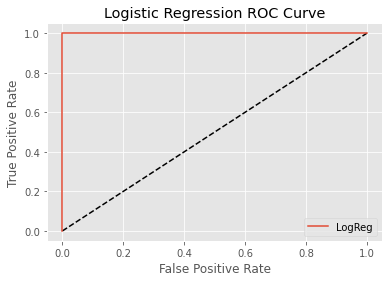

In [147]:
y_pred_prob = model.predict_proba(X_test)[:,1] ## We only want the probability of one class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'LogReg')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The area under the ROC Curve corresponds to a stronger model. 

In [150]:
y_pred_prob
roc_auc_score(y_test, y_pred_prob)

1.0

In [151]:
# Using CV

X = iris['data'][:99]
y = iris['target'][:99]

model = LogisticRegression()
cv = cross_val_score(model, X, y, scoring = 'roc_auc')
cv

array([1., 1., 1., 1., 1.])

# Hyperparameter Tuning

Parameters that can be adjusted are hyperparameters. These need to be checked and experimented with. 
- n_neighbors
- learning_rate

Essential to use cross validation. You still need to have a test set though. This allows us to test our model on unseen data after we've got the best parameters.

Problem: What hyperparameters will work best? Hard to check many as it's computationally inefficient. Grid search is the way to go. 


In [154]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [159]:
param_grid = {
    'n_neighbors': np.arange(1,50),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': [30, 40, 50]
}

model = KNeighborsClassifier()

grid = GridSearchCV(model, param_grid, cv = 5)

grid.fit(X_train, y_train)

print('Best Score:',grid.best_score_)
print('Parameters: ',  grid.best_params_)

Best Score: 1.0
Parameters:  {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 1, 'weights': 'uniform'}


In [160]:
# Randomized search is good when you have lots of parameters to check.

param_grid = {
    'n_neighbors': np.arange(1,50),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': np.arange(30, 50)
}

model = KNeighborsClassifier()

grid = RandomizedSearchCV(model, param_grid, cv = 5)

grid.fit(X_train, y_train)

print('Best Score:',grid.best_score_)
print('Parameters: ',  grid.best_params_)

Best Score: 1.0
Parameters:  {'weights': 'uniform', 'n_neighbors': 2, 'leaf_size': 48, 'algorithm': 'auto'}


# Preprocessing Data

Models can either be improved by preprocessing, or hampered by it. 
- Normalising data
- Filling in missing values
- Converting categories to ints

### Categrical Data

In [203]:
# Easy catergory converter - Only used with one categorical variable
car_data = pd.DataFrame({
    'Origin': ['Europe', 'USA', 'Asia', 'Europe'],
})

car_data

,Origin
0,Europe
1,USA
2,Asia
3,Europe


In [204]:
# Keeping All
print(pd.get_dummies(car_data))

# Dropping first. It's implicit. 
print(pd.get_dummies(car_data, drop_first = True))

   Origin_Asia  Origin_Europe  Origin_USA
0            0              1           0
1            0              0           1
2            1              0           0
3            0              1           0
   Origin_Europe  Origin_USA
0              1           0
1              0           1
2              0           0
3              1           0


### Missing Data

In [211]:
number_data = pd.DataFrame({
    'Height': [25, 24, 0, 42, 43, 0, 32, 15, 26, 43, 0, 32]
})

number_data

,Height
0,25
1,24
2,0
3,42
4,43
5,0
6,32
7,15
8,26
9,43


In [212]:
# First, convert to nans
number_data.replace(0, np.nan, inplace=True)
number_data

,Height
0,25.0
1,24.0
2,NaN
3,42.0
4,43.0
5,NaN
6,32.0
7,15.0
8,26.0
9,43.0


In [215]:
# Either drop rows with nans (but if you have a lot you lose a lot of data), Instead, Imputer)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputer.fit(number_data)

number_data = imputer.transform(number_data)
number_data

array([[25.        ],
       [24.        ],
       [31.33333333],
       [42.        ],
       [43.        ],
       [31.33333333],
       [32.        ],
       [15.        ],
       [26.        ],
       [43.        ],
       [31.33333333],
       [32.        ]])

### Normalising

If data varies by a large amount across various rows it's important to normalize and centre the data. 

In [241]:
data = pd.DataFrame({
    'Col One': [0, 4, 2, 6, 5, 4, 1, 2, 7, 1],
    'Col Two': [0, 23, 1, 4, 54, 15, 75, 78, 90, 2],
    'Col Three': [0, 4, 2, 5, 7, 500, 550, 600, 490, 510]
})

data.describe()

,Col One,Col Two,Col Three
count,10.000000,10.000000,10.000000
mean,3.200000,34.200000,266.800000
std,2.347576,36.214791,279.080156
min,0.000000,0.000000,0.000000
25%,1.250000,2.500000,4.250000
50%,3.000000,19.000000,248.500000
75%,4.750000,69.750000,507.500000
max,7.000000,90.000000,600.000000


In [248]:
from sklearn.preprocessing import scale

data_scaled = scale(data['Col One'])

np.mean(data['Col One']), np.mean(data_scaled)

(3.2, -8.881784197001253e-17)

### Pipelines

Pipelines are useful for rapid prototyping. Steps of the entire process can be stored in a pipeline, which then leaves only one place for changing or debugging. 

In [249]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

data = pd.DataFrame({
    'Height': [25, 24, 0, 42, 43, 0, 32, 15, 26, 43, 0, 32],
    'Target': [2, 2, 3, 4, 4, 3, 3, 1, 2, 4, 3, 3]
})

X = data['Height']
X = X.replace(0, np.nan).to_numpy().reshape(-1,1)
y = data['Target'].to_numpy().reshape(-1,1)

In [251]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
scaler = StandardScaler()
model = LogisticRegression()


steps = [
    ('Imputer', imputer),
    ('Scaler', scaler),
    ('Model', model)
]

pipe = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

pipe.fit(X_train, y_train)
y_preds = pipe.predict(X_test)
pipe.score(X_test, y_test)

C:\Users\Dillon\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1.0

To include GridSearch in the pipeline: 

parameters = {
    
    'model__parameter1': [],

    'model__parameter2': [],
    
    'imputer__parameter1': [],
}

cv = GridSearchCV(pipeline, param_grid = parameters)
